### **Task 1**

Количество срабатываний счетчика Гейгера за минуту $n$ подчиняется распределению Пуассона:
$$
P_{\lambda}(n)=\frac{\lambda^{n}}{n !} e^{-\lambda}
$$

1. В ходе зксперимента счетчик Гейгера сработал за минутy $m$ paз. С помощью теоремы Байеса определите апостериорное распределение на $\lambda$.
2. Эксперммент повторити еще раз, в этот раз счетчик Гейтера сработал за минуту $m$ раз. Как изменилось апостериорное распределение на $\lambda ?$

**Решение:**

Априорно всякое значение $\lambda$ равновероятно, тогда $ P_{0}(\lambda) = \text{const}$
$$
p(\lambda \mid m)=\frac{p(m \mid \lambda) \cdot P_{0}(\lambda)}{\int p(m \mid \lambda)  P_{o}(\lambda) d \lambda}=\frac{p(m \mid x)}{\int p(m \mid \lambda) d \lambda}=\frac{\lambda^{m} e^{-\lambda}}{\Gamma(m+1)} = p( m \mid \lambda)
$$

Далее, применив формулу Байеса еще раз, 

$$
p \left( \lambda \mid m, m^{\prime} \right)=\frac{p\left(m^{\prime} \mid \lambda, m\right) \cdot p(\lambda \mid m)}{\text{const }(m, m^{\prime})} = \frac{1}{\text{const }}\frac{\lambda^{m + m^{\prime}}}{ m^{\prime}! \ m!} e^{-2\lambda}
$$
Нормировочную константу найдем из интегрирования, в итоге получим:
$$
\text{const } = \frac{(m + m^{\prime})!}{ m^{\prime}! \ m!} \frac{1}{2^{m + m^{\prime}}}
$$
В итоге,
$$
\boxed{p \left( \lambda \mid m, m^{\prime} \right) = \frac{2^{m + m^{\prime} }}{ (m + m^{\prime})!} \lambda^{m + m^{\prime}}e^{-2\lambda}}
$$

### **Task 2** 

Ультрачувствительный тест от короновируса ошибается в $1\%$ случаев (как в одну, так и в другую сторону). В
данный момент в популяции доля заболевших $10^{−5}$ . Петя получил положительный тест на коронавирус. С какой
вероятностью он действительно болеет коронавирусом?

**Решение:**

По формуле Байесовского вывода:
$$P(\text{ infected }|\text{+}) = \dfrac{P(\text{+}| \text{ infected }) P(\text{ infected})}{P(\text{+}| \text{ infected }) P(\text{ infected}) + P(\text{-}| \text{ infected }) P(\text{ infected })} \approx 10^{-3} = 0.1 \%$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

from IPython.display import clear_output

### **Task 3**
**K** -Fold crossvalidation

In [6]:
# шаг градиентного спуска
def Grad_descent_iter(X, y, w, mu=0.1, alpha=0.1):
    grad = 2 * (X @ w - y) @ X + 2 * mu * np.sign(w)
    return w - alpha * grad

In [7]:
N = 150
MAX_OREDER = 10

x = np.linspace(0, 1, N)
print(x.shape)

poly = PolynomialFeatures(MAX_OREDER)
X = poly.fit_transform(x.reshape(N, 1))
Xn = (X - np.mean(X, axis=0)) 
stdev = np.std(X, axis=0)
stdev[stdev==0] = 1
Xn /= stdev
Xn[:,0] += 1

(150,)


In [8]:
# вопрос про регуляризацию. Нужна ли она?

X_deg = Xn[:,-1] *1 + Xn[:,-1]* np.random.normal(0,0.5)
Xn = np.hstack([Xn,X_deg.reshape(-1,1)]) #добавим линейно зависимых признаков

print("X shape:", Xn.shape)

X shape: (150, 12)


(150,)


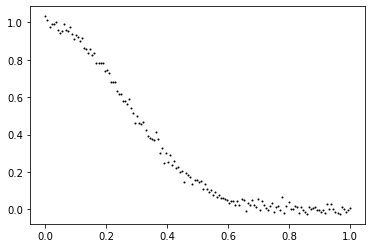

In [66]:
# вот такую функию будем приближать
y = np.exp(-8 * x**2) + np.random.normal(0,2*1e-2, x.shape)
print(y.shape)

plt.scatter(x, y, color="k", s=1)
plt.show()

In [67]:
# попрубуем для начала обучиться функцией из коробки
reg = LassoCV(cv=3).fit(Xn, y)
clear_output()
print(reg.score(Xn, y)) # примерно такой score будем считать приемлемым

0.9907320924571166


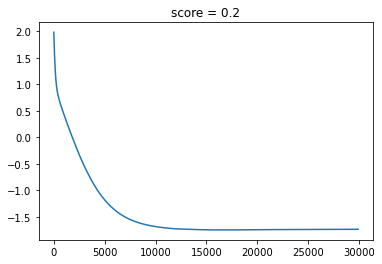

In [68]:
alpha = 2e-5
w0 = np.random.normal(0, 0.1, Xn.shape[1])

ress = []
for i in range(30000):
    w0 = Grad_descent_iter(Xn, y, w0, mu=0.1, alpha=alpha)
    score = np.sum((Xn @ w0 - y)**2)
    ress.append(score)
    
plt.plot(np.log(ress[100:]))
plt.title("score = {:.1f}".format(ress[-1]))
plt.show()

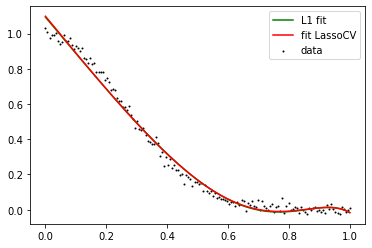

In [69]:
plt.plot(x, Xn @ w0, label="L1 fit", color="g")
plt.plot(x, reg.predict(Xn), label="fit LassoCV", color="r")
plt.scatter(x, y, label="data", color="k", s=1)
plt.legend()
plt.show()

### KFold

Loss to minimise with Gradient Descent:
$$ L = \|y - X w \|_{2}^{2} + \mu \|w \|_{1}$$

$$ \nabla L = 2 (X w - y) X + 2 \mu \ \text{sgn}(w) $$

$$ w_{n} - w_{n-1} = \alpha \nabla L $$

In [70]:
def Train(X, y, mu, alpha, n_iter):
    w0 = np.random.normal(0, 0.1, X.shape[1])
    w = w0
    
    ress = []
    for i in range(n_iter):
        w = Grad_descent_iter(X, y, w, mu=mu, alpha=alpha)
        score = np.sum((X @ w - y)**2)
        ress.append(score)
    return w

In [71]:
def Loss(X, y, w):
    return np.sum((X @ w - y)**2)

In [72]:
K = 3
kf = KFold(K, shuffle=True)
data = []

for mu in [0.01, 1, 10]:
    for alpha in [1e-6, 1e-5, 1e-4]:
        scors = []
        for train, test in kf.split(Xn):
            X_train, X_test, y_train, y_test = Xn[train], Xn[test], y[train], y[test]
            w = Train(X_train, y_train, mu=mu, alpha=alpha, n_iter=30000)
            scors.append(Loss(X_test, y_test, w))
        score = np.mean(scors)
        delta = np.std(scors)
        data.append([score, mu, alpha])

In [77]:
data_params = np.array(data)
data_params = data_params[np.argsort(data_params[:, 0])]
data_params

array([[5.54066360e-02, 1.00000000e-02, 1.00000000e-04],
       [6.92367276e-02, 1.00000000e-02, 1.00000000e-05],
       [2.36325912e-01, 1.00000000e+00, 1.00000000e-04],
       [2.58784483e-01, 1.00000000e+00, 1.00000000e-05],
       [5.96850753e-01, 1.00000000e-02, 1.00000000e-06],
       [6.27636316e-01, 1.00000000e+00, 1.00000000e-06],
       [1.87868021e+00, 1.00000000e+01, 1.00000000e-05],
       [1.97453748e+00, 1.00000000e+01, 1.00000000e-04],
       [2.20877518e+00, 1.00000000e+01, 1.00000000e-06]])

In [78]:
# вот, через KFold нашли параметры, приблизившие нас к коробочному варианту
mu_KFold, alpha_KFold = data_params[0][1:]

w = Train(Xn, y, mu=mu_KFold, alpha=alpha_KFold, n_iter=30000)

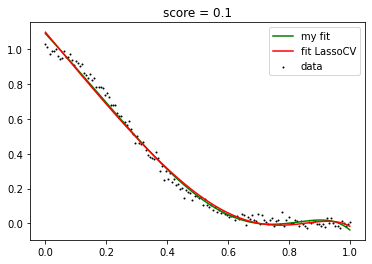

In [79]:
plt.plot(x, Xn @ w, label="my fit", color="g")
plt.plot(x, reg.predict(Xn), label="fit LassoCV", color="r")
plt.scatter(x, y, label="data", color="k", s=1)
plt.legend()
plt.title("score = {:.1f}".format(Loss(Xn, y, w)))
plt.show()

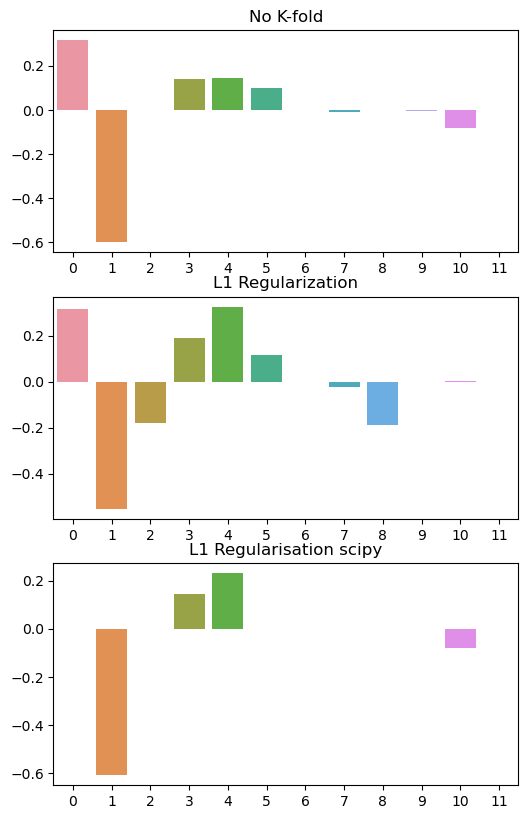

In [80]:
fig, axs = plt.subplots(3,1, dpi=100, figsize=(6,10))
sns.barplot(x=list(range(len(w0))),y=w0, ax=axs[0])
axs[0].set_title('No K-fold')
sns.barplot(x=list(range(len(w))),y=w, ax=axs[1])
axs[1].set_title('L1 Regularization')
sns.barplot(x=list(range(len(w))),y=reg.coef_, ax=axs[2])
axs[2].set_title('L1 Regularisation scipy')
plt.show()

### **Task 4**

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

In [91]:
X, y = load_diabetes(return_X_y=True)

print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [110]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [126]:
def FitDataLasso(alpha, Xtrain, ytrain, Xtest, ytest):
    L1reg = Lasso(alpha=alpha)
    L1reg.fit(Xtrain,ytrain,alpha)
    
    predict_test = L1reg.predict(Xtest)
    
    return np.hstack([alpha, mean_squared_error(predict_test, ytest), L1reg.coef_])

In [127]:
alphas = np.arange(0.001,2.5,0.001)
alphas_big = np.arange(2.5,5,0.01)
data = np.vstack([FitDataLasso(alpha, Xtrain, ytrain, Xtest, ytest) for alpha in alphas])
data_big = np.vstack([FitDataLasso(alpha, Xtrain, ytrain, Xtest, ytest) for alpha in alphas_big])

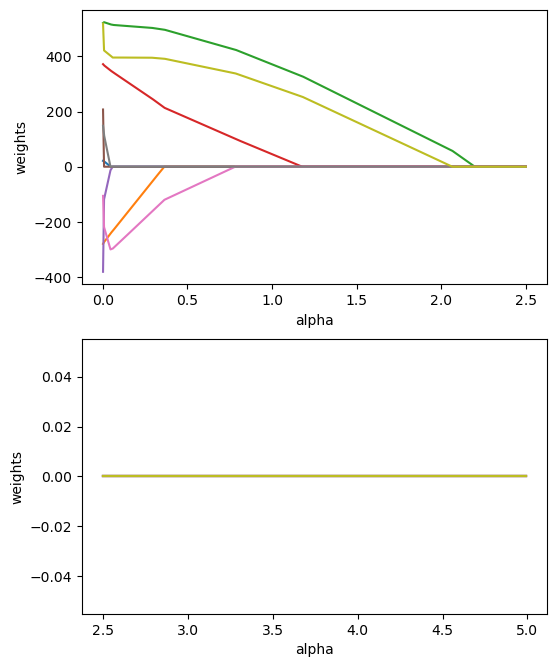

In [128]:
fig, axs = plt.subplots(2, 1,figsize=(6,8), dpi=100)

axs[0].set_ylabel('weights')
axs[0].set_xlabel('alpha')
axs[0].plot(alphas,data[:,2:-1])
axs[1].plot(alphas_big,data_big[:,2:-1])
axs[1].set_ylabel('weights')
axs[1].set_xlabel('alpha')

plt.show()

## **Task 5**

Покажите, что задача минимизации квадратичной функции потерь с дополнительным ограничением (лассо Тибширани):
$$
\mathcal{L}=\|X w-y\|^{2} \rightarrow \min _{w}, \quad \sum_{\alpha}\left|w_{\alpha}\right|<C
$$
эквивалентна $L_1$-регуляризации. *Указание:* можно воспользоваться условиями Каруша - Куна - Таккера (обобщение метода Лагранжа).

**Решение:**

$$ g( \mathbf{ w} ) = \sum_{\alpha}\left|w_{\alpha}\right| - C < 0 $$
По условиями Каруша - Куна - Таккера получаем:
1. $ \mathcal{L}_{\lambda} = \|X w-y\|^{2} + \lambda \ g( \mathbf{ w} )  $
2. $ \lambda > 0$
3. $  g( \breve{\mathbf{ w} })  = 0  $

Тогда $\breve{\mathbf{ w}} $ удовлетворяет решению задачи условной минимизации.

$$ \mathcal{L}_{\lambda} = \|X w-y\|^{2} + \lambda  \sum_{\alpha}\left|w_{\alpha}\right|  - \lambda C $$.
При минимизации по $\mathbf{w} $ константа  $\lambda C$ не влияет на решение этой задачи. В итоге получаем эквивалентность.


